In [1]:
import pandas as pd


topics_file = '../data/topic_models/novels-10921/topic_labels_PB.tsv'

df = pd.read_csv(topics_file, sep='\t')
for idx, row in df[df.topic_num.isna() == False].iterrows():
    #print(row)
    print(f"{row['topic_num']} & {row['topic_size']} & {row['topic_words']} \\\\")
    break

0.0 & 1655.0 & cara, teemde, privejet, querida, lustgevoelen, dio, sensuele, liefdeloos, sensuel, mou, si, mio, sexappeal, zakenwereld, palazzo, handgemaakte, designkleding, grazie, roomwitte, pleziert, inademend, dolverliefd, tesoro, hotelsuite, koosnaampje, schokschouderde, schijnvertoning, mondain, sandaalt, roddelper, strapless, kwet, zakenimperium, workaholic, tintelden, bezitterigheid, besefte, honingkleurig, wegkeek, trouwerij, kasjmier, benadruken, azuurblauw, multimiljonair, zakendeal, werkneemster, doordringend, chiffon, inpalmen, overbrugen \\


In [2]:
topic_labels = df[df.topic_num.isna() == False][['topic_num', 'topic_size', 'topic_words']]
topic_labels['topic_num'] = topic_labels.topic_num.astype(int)
topic_labels['topic_size'] = topic_labels.topic_size.astype(int)


In [3]:
topic_labels.to_csv('../data/topic_labels.tsv', sep='\t', index=False)

## Topic Labels of April 2024 Model

In [106]:
from collections import Counter
from itertools import combinations

from openpyxl import load_workbook


labels_file = '../../../../impact-of-fiction/data/topic_models/topic_words-speed_learn-min_df_0.01-max_df_0.5-labelled_Katja.xlsx'

wb = load_workbook(labels_file)
ws = wb.active

label_freq = Counter()
num_label_freq = Counter()
cooc = Counter()


data = []
for ri, row in enumerate(ws):
    values = [cell.value for cell in row]
    if ri == 0:
        headers = values
        headers[3] = 'theme_label'
    else:
        row_json = {header: values[hi] for hi, header in enumerate(headers)}
        labels = row_json['theme_label'].strip().split('; ')
        row_json['theme_label'] = ';'.join(labels)
        label_freq.update(labels)
        num_label_freq.update([len(labels)])
        cooc.update([(label1, label2) for label1, label2 in combinations(sorted(labels), 2)])
    
        data.append(row_json)


In [114]:

count = 0
for label, freq in label_freq.most_common():
    count += 1
    print(count, label, freq)


labels = [l for l, _ in label_freq.most_common()]
labels = [l for l in labels if l != 'other'] + ['other']
print(", ".join([f"{li+1}. " + r"{\em " + f"{l}" + "}" for li, l in enumerate(labels)]))

1 geography and setting 63
2 behaviours/feelings 43
3 culture 42
4 other 33
5 crime 28
6 history 26
7 religion, spirituality and philosophy 16
8 supernatural, fantasy and sci-fi 13
9 war 13
10 society 12
11 city, travel and transport 11
12 romance and sex 10
13 medicine/health 9
14 wildlife/nature 9
15 economy and work 8
16 lifestyle and sport 7
17 politics 7
18 family 5
19 science 5
1. {\em geography and setting}, 2. {\em behaviours/feelings}, 3. {\em culture}, 4. {\em crime}, 5. {\em history}, 6. {\em religion, spirituality and philosophy}, 7. {\em supernatural, fantasy and sci-fi}, 8. {\em war}, 9. {\em society}, 10. {\em city, travel and transport}, 11. {\em romance and sex}, 12. {\em medicine/health}, 13. {\em wildlife/nature}, 14. {\em economy and work}, 15. {\em lifestyle and sport}, 16. {\em politics}, 17. {\em family}, 18. {\em science}, 19. {\em other}


In [108]:
{l: l for l in label_freq.keys()}

{'city, travel and transport': 'city, travel and transport',
 'economy and work': 'economy and work',
 'behaviours/feelings': 'behaviours/feelings',
 'religion, spirituality and philosophy': 'religion, spirituality and philosophy',
 'supernatural, fantasy and sci-fi': 'supernatural, fantasy and sci-fi',
 'other': 'other',
 'crime': 'crime',
 'geography and setting': 'geography and setting',
 'history': 'history',
 'medicine/health': 'medicine/health',
 'family': 'family',
 'lifestyle and sport': 'lifestyle and sport',
 'culture': 'culture',
 'politics': 'politics',
 'war': 'war',
 'society': 'society',
 'romance and sex': 'romance and sex',
 'science': 'science',
 'wildlife/nature': 'wildlife/nature'}

In [67]:
label_map = {
    'city, travel and transport': 'travel & transport',
    'economy and work': 'economy & work',
    'behaviours/feelings': 'behaviours / feelings',
    'religion, spirituality and philosophy': 'reli. / spirit. / phil.',
    'supernatural, fantasy and sci-fi': 'super., fantasy & sci-fi',
    'other': 'other',
    'crime': 'crime',
    'geography and setting': 'geography & setting',
    'history': 'history',
    'medicine/health': 'medicine / health',
    'family': 'family',
    'lifestyle and sport': 'lifestyle & sport',
    'culture': 'culture',
    'politics': 'politics',
    'war': 'war',
    'society': 'society',
    'romance and sex': 'romance & sex',
    'science': 'science',
    'wildlife/nature': 'wildlife / nature'
}

In [109]:
import pandas as pd

df = pd.DataFrame(data)
df['theme_label_short'] = df.theme_label.apply(lambda fl: ';'.join([label_map[fl] for fl in fl.split(';')]))
df[df.theme_label.str.contains(';')]

df.to_csv('../data/topic_labels-new_model.tsv', sep='\t', index=False)

In [110]:
df

,topic_num,topic_size,topic_words,theme_label,Notes,theme_label_short
0,0,512,stoeptegel minutenlang fietssleutel snelbinder...,"city, travel and transport",None,travel & transport
1,1,415,implementeren bedrijfscultuur managementteam m...,economy and work,None,economy & work
2,2,383,jemig gênant sorry jeetje irritant verpessen g...,behaviours/feelings,None,behaviours / feelings
3,3,320,thuisgekomen koopavond koffiedrinken ongezelli...,behaviours/feelings,None,behaviours / feelings
4,4,311,theologisch verkondiging theoloog godswege the...,"religion, spirituality and philosophy",None,reli. / spirit. / phil.
...,...,...,...,...,...,...
223,223,22,manege halster hoofdstel hinnikken pony’s voor...,wildlife/nature,hourseriding,wildlife / nature
224,224,21,chesapeake susie bree mick jess mack o’brien t...,other,?,other
225,225,20,maarten ad volkscultuur mieter sien rie balk v...,other,?,other
226,226,16,peeters dalí choco politiekantoor flik onderzo...,crime,Flemish,crime


In [111]:
df['theme_label_list'] = df.theme_label_short.str.split(';')
books_per_theme = df.explode('theme_label_list').groupby('theme_label_list').topic_size.sum()
books_per_theme = books_per_theme.rename('Number of books').to_frame().reset_index().rename(columns={'theme_label_list': 'Theme'})
books_per_theme
topics_per_theme = df.explode('theme_label_list').theme_label_list.value_counts()
topics_per_theme = topics_per_theme.rename('Number of topics').to_frame().reset_index().rename(columns={'index': 'Theme'})

per_theme = pd.merge(topics_per_theme, books_per_theme, on='Theme')
per_theme

,Theme,Number of topics,Number of books
0,geography & setting,63,4317
1,behaviours / feelings,43,3860
2,culture,42,3524
3,other,33,1756
4,crime,28,1899
5,history,26,2020
6,reli. / spirit. / phil.,16,1797
7,"super., fantasy & sci-fi",13,936
8,war,13,952
9,society,12,851


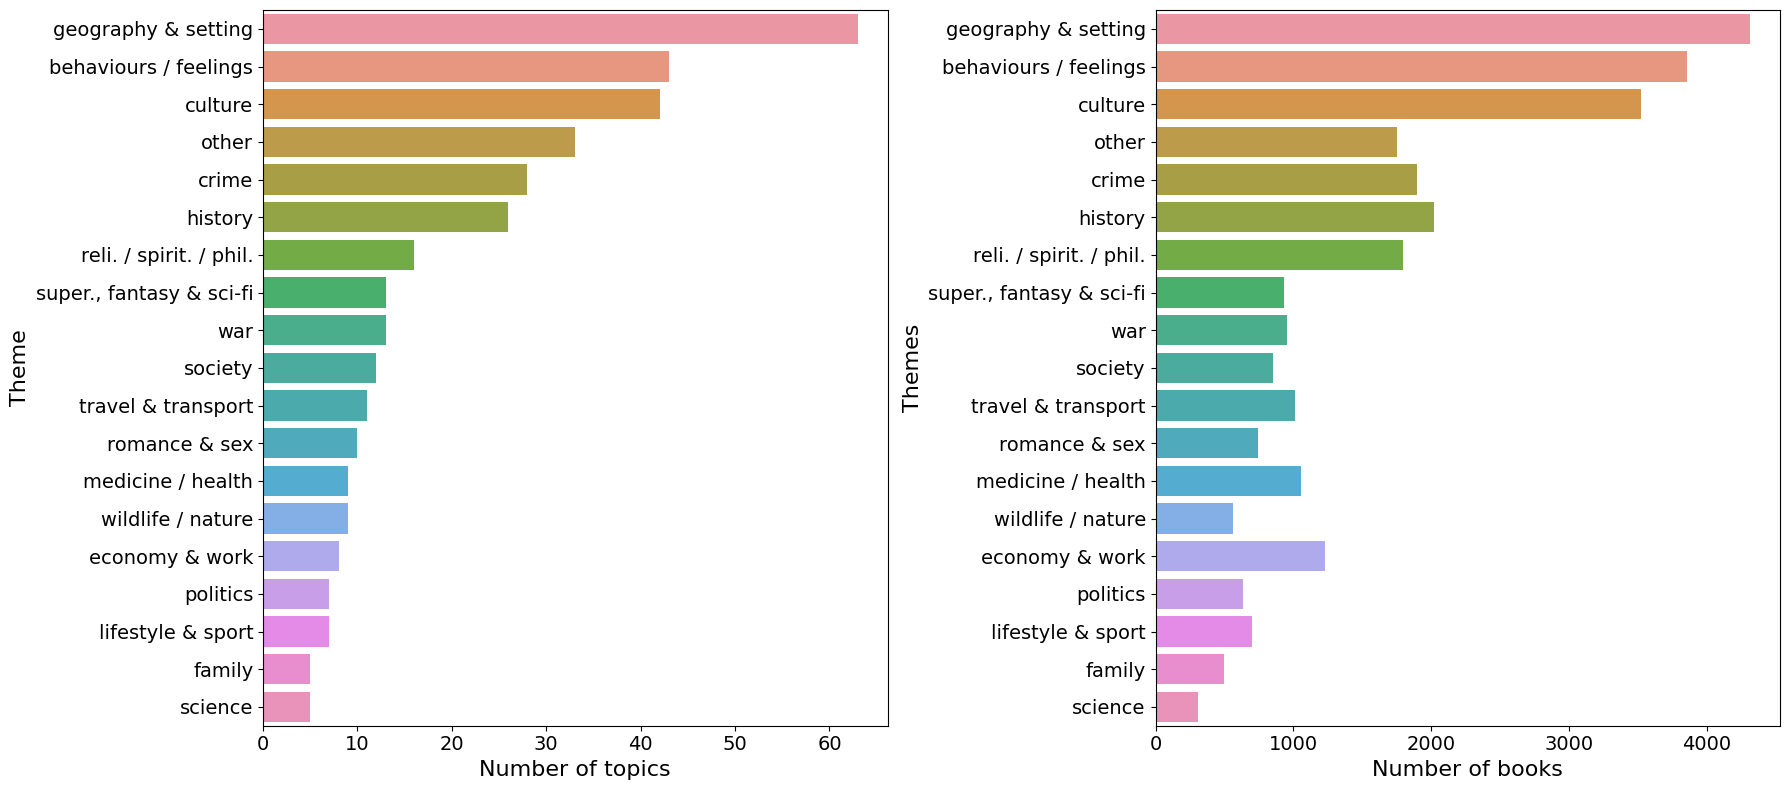

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2)

sns.barplot(data=per_theme, x='Number of topics', y='Theme', ax=ax[0])
sns.barplot(data=per_theme, x='Number of books', y='Theme', ax=ax[1])
#topics_per_theme
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].set_xlabel('Number of topics', fontsize=16)
ax[1].set_xlabel('Number of books', fontsize=16)
ax[0].set_ylabel('Theme', fontsize=16)
ax[1].set_ylabel('Themes', fontsize=16)

fig.set_size_inches(18, 8)
fig.tight_layout()
fig.savefig('../images/genre_topic/theme_book_topic_dist.png', dpi=150)

In [34]:
sum(label_freq.values())
num_label_freq

Counter({1: 124, 2: 78, 3: 24, 4: 2})

In [35]:
for labels, freq in cooc.most_common():
    label1, label2 = labels
    intersection = freq
    union = label_freq[label1] + label_freq[label2] - freq
    iou = intersection / union
    print(f"{label1: <35}\t{label2: <35}\t{freq: >4}\t{label_freq[label1]: >4}\t{label_freq[label2]: >4}\t{iou: >6.2f}")

culture                            	geography and setting              	  24	  42	  63	  0.30
geography and setting              	history                            	  15	  63	  26	  0.20
behaviours/feelings                	geography and setting              	   9	  43	  63	  0.09
crime                              	geography and setting              	   8	  28	  63	  0.10
history                            	war                                	   8	  26	  13	  0.26
behaviours/feelings                	culture                            	   7	  43	  42	  0.09
culture                            	history                            	   5	  42	  26	  0.08
economy and work                   	society                            	   4	   8	  12	  0.25
geography and setting              	religion, spirituality and philosophy	   4	  63	  16	  0.05
behaviours/feelings                	other                              	   4	  43	  33	  0.06
behaviours/feelings                	economy and work      